# Welcome to Colab!

## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code and audio.

**How to get started**
*  Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google Account.
*  <a href="https://aistudio.google.com/app/apikey">Create an API key</a>.
* Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a> or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.

**Discover Gemini's advanced capabilities**
*  Play with Gemini <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb">multimodal outputs</a>, mixing text and images in an iterative way.
*  Discover the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">multimodal Live API</a> &#40;demo <a href="https://aistudio.google.com/live">here</a>&#41;.
*  Learn how to <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb&quot;">analyse images and detect items in your pictures</a> using Gemini &#40;bonus, there's a <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">3D version</a> as well!&#41;.
*  Unlock the power of the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">Gemini thinking model</a>, capable of solving complex tasks with its inner thoughts.
      
**Explore complex use cases**
*  Use <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">Gemini grounding capabilities</a> to create a report on a company based on what the model can find on the Internet.
*  Extract <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">invoices and form data from PDFs</a> in a structured way.
*  Create <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">illustrations based on a whole book</a> using Gemini large context window and Imagen.

To learn more, take a look at the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.


Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  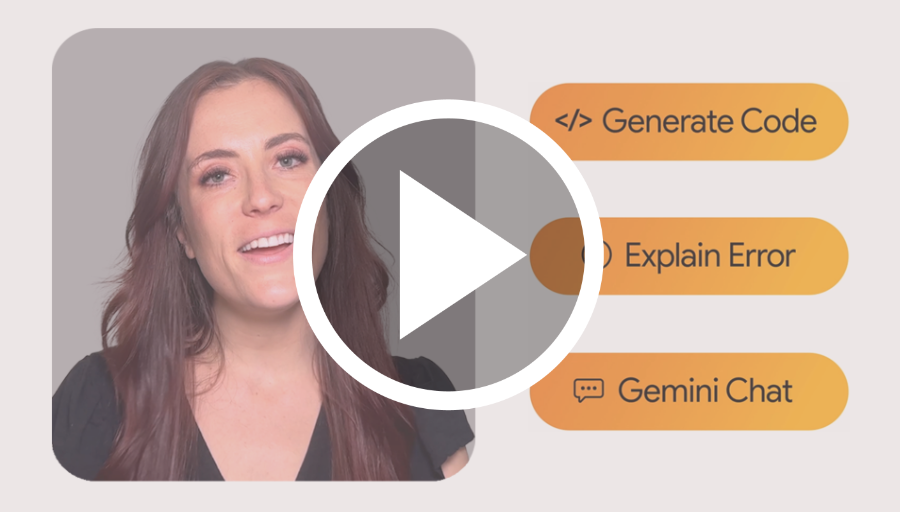
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> or <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y">Colab features you may have missed</a> to learn more or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [1]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [2]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

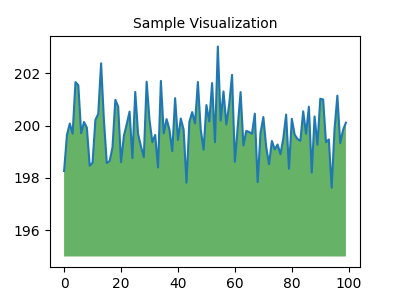

In [3]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning that you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for <strong>pandas</strong> code to finish running and want to go faster, you can switch to a GPU runtime and use libraries like <a href="https://rapids.ai/cudf-pandas">RAPIDS cuDF</a> that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">10-minute guide</a> or
 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">US stock market data analysis demo</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning

<div>

These are a few of the notebooks related to machine learning, including Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.


# Part 3: Models

# Installing Libraries

In [4]:
!pip install tensorflow seaborn


# Mounting Content from drive to Google Colab

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creating Zip Path

In [6]:
zip_path = '/content/drive/MyDrive/split/split.zip'


In [7]:
import zipfile
import os
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
os.listdir('/content/split')


['.DS_Store',
 'masks',
 'train',
 'test',
 '__MACOSX',
 'corrosion_features.csv',
 'unzipped',
 'split',
 'validation']

In [8]:
import os

zip_path = '/content/drive/MyDrive/split/split.zip'
os.path.exists(zip_path)
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
['train', 'validation', 'test']




['train', 'validation', 'test']

 Inside each split, create subdirectories for the classes:
  - `CORROSION`
  - `NOCORROSION`

In [9]:
import os

base_dir = '/content/split'

train_dir = os.path.join(base_dir, 'train')
train_CORROSION_dir = os.path.join(train_dir, 'CORROSION')
train_NOCORROSION_dir = os.path.join(train_dir, 'NOCORROSION')

validation_dir = os.path.join(base_dir, 'validation')
validation_CORROSION_dir = os.path.join(validation_dir, 'CORROSION')
validation_NOCORROSION_dir = os.path.join(validation_dir, 'NOCORROSION')

test_dir = os.path.join(base_dir, 'test')
test_CORROSION_dir = os.path.join(test_dir, 'CORROSION')
test_NOCORROSION_dir = os.path.join(test_dir, 'NOCORROSION')


# Printing number of images in each subdirectory

In [10]:
def num_files_in_directory(path):
    return len([file for file in os.listdir(path) if file.endswith('.jpg')])

print("[Train] CORROSION:", num_files_in_directory(train_CORROSION_dir))
print("[Train] NOCORROSION:", num_files_in_directory(train_NOCORROSION_dir))

print("[Validation] CORROSION:", num_files_in_directory(validation_CORROSION_dir))
print("[Validation] NOCORROSION:", num_files_in_directory(validation_NOCORROSION_dir))

print("[Test] CORROSION:", num_files_in_directory(test_CORROSION_dir))
print("[Test] NOCORROSION:", num_files_in_directory(test_NOCORROSION_dir))


[Train] CORROSION: 693
[Train] NOCORROSION: 580
[Validation] CORROSION: 198
[Validation] NOCORROSION: 166
[Test] CORROSION: 99
[Test] NOCORROSION: 83


In [11]:

train_dir = '/content/split/train'
train_CORROSION_dir = '/content/split/train/CORROSION/'
train_NOCORROSION_dir = '/content/split/train/NOCORROSION/'

validation_dir = '/content/split/validation'
validation_CORROSION_dir = '/content/split/validation/CORROSION/'
validation_NOCORROSION_dir = '/content/split/validation/NOCORROSION/'

test_dir = '/content/split/test'
test_CORROSION_dir = '/content/split/test/CORROSION/'
test_NOCORROSION_dir = '/content/split/test/NOCORROSION/'


In [13]:
import os

print(os.listdir('/content/split'))
print(os.listdir('/content/split/train'))
print(os.listdir('/content/split/validation'))
print(os.listdir('/content/split/test'))


['.DS_Store', 'masks', 'train', 'test', '__MACOSX', 'corrosion_features.csv', 'unzipped', 'split', 'validation']
['.DS_Store', 'NOCORROSION', 'CORROSION']
['NOCORROSION', 'CORROSION']
['.DS_Store', 'NOCORROSION', 'CORROSION']


In [14]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from skimage import io, color


In [15]:
from google.colab import drive
import zipfile
import os

# 1. Mount your Drive
drive.mount('/content/drive')

# 2. Path to your zip file
zip_path = '/content/drive/MyDrive/split/split.zip'

# 3. Extract it into /content/split
extract_path = '/content/split'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Files extracted successfully!")
print(os.listdir(extract_path))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Files extracted successfully!
['.DS_Store', 'masks', 'train', 'test', '__MACOSX', 'corrosion_features.csv', 'unzipped', 'split', 'validation']


In [16]:
import os

folder = '/content/split'
print("Files in directory:")
print(os.listdir(folder))


Files in directory:
['.DS_Store', 'masks', 'train', 'test', '__MACOSX', 'corrosion_features.csv', 'unzipped', 'split', 'validation']


In [17]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/split/split.zip'
extract_dir = '/content/split/unzipped'

# Create extraction folder if not exists
os.makedirs(extract_dir, exist_ok=True)

# Unzip the contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Unzipped files to:", extract_dir)
print("Files inside:", os.listdir(extract_dir))


✅ Unzipped files to: /content/split/unzipped
Files inside: ['__MACOSX', 'split']


✅ Found image: /content/split/unzipped/split/train/NOCORROSION/501d556d36.jpg


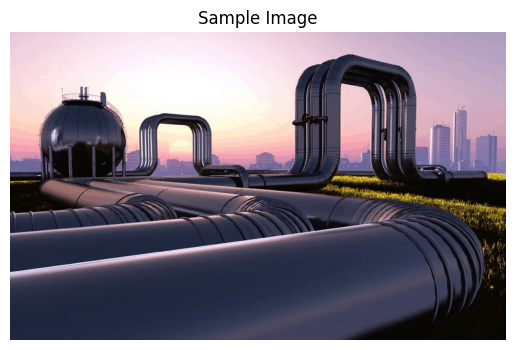

In [18]:
import os
import cv2
import matplotlib.pyplot as plt

# Root folder where files were extracted
root_dir = '/content/split/unzipped/split'

# Walk through all subdirectories and find the first image file
image_path = None
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, file)
            break
    if image_path:
        break

if image_path is None:
    print("⚠️ No image found in any folder.")
else:
    print("✅ Found image:", image_path)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Sample Image')
    plt.show()


In [19]:
pip install scikit-image pandas tqdm


In [20]:
#!/usr/bin/env python3
"""
corrosion_feature_extraction.py

Walks a dataset root (train/test/validation), extracts features per image:
- edge_density (Canny)
- GLCM: contrast, homogeneity, energy, correlation
- entropy (Shannon)
- mean Lab channels (L, A, B)
- corrosion_area_fraction (Otsu + morphological cleanup)

Saves results to CSV and optionally writes overlay mask images for quick visual checks.
"""

import os
from pathlib import Path
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from tqdm import tqdm

# -------- CONFIG --------
ROOT_DIR = Path('/content/split/unzipped/split')   # <-- change if needed
OUTPUT_CSV = Path('/content/split/corrosion_features.csv')
OUTPUT_MASK_DIR = Path('/content/split/masks')
RESIZE = (256, 256)               # standard size used for computations
GLCM_DISTANCES = [5]
GLCM_ANGLES = [0]
SAVE_MASKS = True                 # set False to skip writing overlay images
# ------------------------

def is_image_file(p: Path):
    return p.suffix.lower() in ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

def extract_label_set_from_path(p: Path):
    """Extract label and dataset split name from path."""
    parts = [part.lower() for part in p.parts]
    setname = None
    for cand in ('train', 'test', 'validation', 'val', 'training'):
        if cand in parts:
            setname = cand
            break
    label = p.parent.name
    return label, setname or 'unknown'

def compute_features(img_bgr):
    """Compute corrosion-related features from an image."""
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, RESIZE, interpolation=cv2.INTER_AREA)
    gray_eq = cv2.equalizeHist(gray)

    edges = cv2.Canny(gray_eq, 100, 200)
    edge_density = np.count_nonzero(edges) / edges.size

    img_for_glcm = gray_eq.astype(np.uint8)
    glcm = graycomatrix(
        img_for_glcm,
        distances=GLCM_DISTANCES,
        angles=GLCM_ANGLES,
        levels=256,
        symmetric=True,
        normed=True
    )
    contrast = float(graycoprops(glcm, 'contrast')[0, 0])
    homogeneity = float(graycoprops(glcm, 'homogeneity')[0, 0])
    energy = float(graycoprops(glcm, 'energy')[0, 0])
    correlation = float(graycoprops(glcm, 'correlation')[0, 0])

    entropy = float(shannon_entropy(img_for_glcm))

    lab = cv2.cvtColor(cv2.resize(img_bgr, RESIZE, interpolation=cv2.INTER_AREA), cv2.COLOR_BGR2LAB)
    mean_L = float(np.mean(lab[:, :, 0]))
    mean_A = float(np.mean(lab[:, :, 1]))
    mean_B = float(np.mean(lab[:, :, 2]))

    _, thresh_img = cv2.threshold(img_for_glcm, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    thresh_clean = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations=1)
    corrosion_area_fraction = float(np.count_nonzero(thresh_clean == 255) / thresh_clean.size)

    return {
        'edge_density': edge_density,
        'contrast': contrast,
        'homogeneity': homogeneity,
        'energy': energy,
        'correlation': correlation,
        'entropy': entropy,
        'mean_L': mean_L,
        'mean_A': mean_A,
        'mean_B': mean_B,
        'corrosion_area_fraction': corrosion_area_fraction,
        'mask': thresh_clean
    }

def main(root_dir=ROOT_DIR, out_csv=OUTPUT_CSV, save_masks=SAVE_MASKS, out_mask_dir=OUTPUT_MASK_DIR):
    root_dir = Path(root_dir)
    if not root_dir.exists():
        raise FileNotFoundError(f"Root dir not found: {root_dir}")

    if save_masks:
        out_mask_dir = Path(out_mask_dir)
        out_mask_dir.mkdir(parents=True, exist_ok=True)

    image_paths = [p for p in root_dir.rglob('*') if p.is_file() and is_image_file(p)]
    print(f"Found {len(image_paths)} images under {root_dir}")

    features_rows = []
    for p in tqdm(sorted(image_paths)):
        try:
            img = cv2.imread(str(p))
            if img is None:
                print("Warning: could not read", p)
                continue

            feats = compute_features(img)
            label, setname = extract_label_set_from_path(p)

            row = {
                'file_path': str(p),
                'set': setname,
                'label': label,
                'edge_density': feats['edge_density'],
                'contrast': feats['contrast'],
                'homogeneity': feats['homogeneity'],
                'energy': feats['energy'],
                'correlation': feats['correlation'],
                'entropy': feats['entropy'],
                'mean_L': feats['mean_L'],
                'mean_A': feats['mean_A'],
                'mean_B': feats['mean_B'],
                'corrosion_area_fraction': feats['corrosion_area_fraction']
            }
            features_rows.append(row)

            if save_masks:
                mask = feats['mask']
                resized_img = cv2.resize(img, RESIZE, interpolation=cv2.INTER_AREA)
                mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
                overlay = cv2.addWeighted(resized_img, 0.7, mask_rgb, 0.3, 0)
                out_name = out_mask_dir / f"{p.stem}_overlay.png"
                cv2.imwrite(str(out_name), overlay)

        except Exception as e:
            print(f"Error processing {p}: {e}")

    df = pd.DataFrame(features_rows)
    df.to_csv(str(out_csv), index=False)
    print(f"Saved features to {out_csv}")
    print(df.head())
    return df

if __name__ == "__main__":
    main()

Found 1819 images under /content/split/unzipped/split


100%|██████████| 1819/1819 [01:48<00:00, 16.79it/s]

Saved features to /content/split/corrosion_features.csv
                                           file_path   set      label  \
0  /content/split/unzipped/split/test/CORROSION/0...  test  CORROSION   
1  /content/split/unzipped/split/test/CORROSION/0...  test  CORROSION   
2  /content/split/unzipped/split/test/CORROSION/0...  test  CORROSION   
3  /content/split/unzipped/split/test/CORROSION/0...  test  CORROSION   
4  /content/split/unzipped/split/test/CORROSION/0...  test  CORROSION   

   edge_density     contrast  homogeneity    energy  correlation   entropy  \
0      0.347290  5957.602216     0.032137  0.009300     0.452577  7.125399   
1      0.083115  1412.731169     0.368099  0.090808     0.875139  6.525431   
2      0.097626   907.049287     0.177772  0.048104     0.917596  7.103438   
3      0.098145  1689.293187     0.251897  0.072251     0.850202  7.080294   
4      0.161438  3891.194612     0.085118  0.015708     0.642135  6.913276   

       mean_L      mean_A      mean_

In [21]:
from google.colab import files

files.download('/content/split/corrosion_features.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
pip install --upgrade scikit-learn


In [25]:
!pip install pandas

In [28]:
import pandas as pd

# 1️⃣ Load CSV
df = pd.read_csv('/content/split/corrosion_features.csv')

# 2️⃣ Select features (X) and target (y)
X = df[['edge_density','contrast','homogeneity','energy','correlation',
        'entropy','mean_L','mean_A','mean_B']]
y = df['corrosion_area_fraction']

# 3️⃣ Ensure numeric and handle NaNs
X = X.fillna(0).astype(float)
y = y.fillna(0).astype(float)

# Now you can proceed with train/test split and model training


In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

# y_test and y_pred must be numeric
y_test_numeric = np.array(y_test, dtype=float)
y_pred_numeric = np.array(y_pred, dtype=float)

# Compute MSE
mse = mean_squared_error(y_test_numeric, y_pred_numeric)

# Compute RMSE manually
rmse = np.sqrt(mse)

print("R2 score:", r2_score(y_test_numeric, y_pred_numeric))
print("RMSE:", rmse)


R2 score: 0.850346921259117
RMSE: 0.027197573199310248


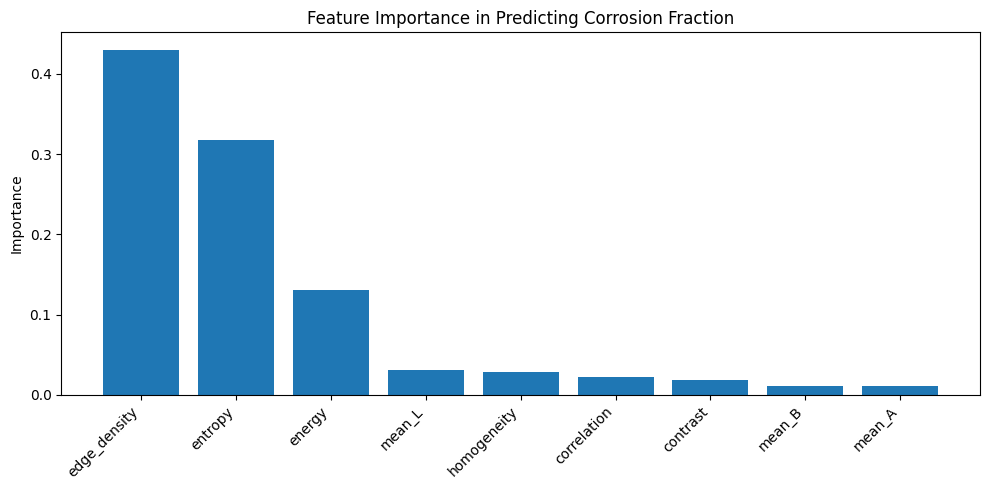

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importances from trained Random Forest
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot using matplotlib directly
plt.figure(figsize=(10,5))
plt.bar(feat_importances.index, feat_importances.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.title('Feature Importance in Predicting Corrosion Fraction')
plt.tight_layout()
plt.show()


In [32]:
import numpy as np
import pandas as pd

# Suppose you have current timestamps for samples (or assume t_total = 100 units)
t_total = 100  # could be days, hours, etc.
f_critical = 0.8  # fraction at which metal is considered failed

# y_pred_numeric = predicted corrosion fraction from your model
# For demonstration, let's create a DataFrame
df_pred = pd.DataFrame({
    'file_path': df.loc[y_test.index, 'file_path'],
    'predicted_corrosion_fraction': y_pred_numeric
})

# Compute remaining lifetime
df_pred['remaining_lifetime'] = t_total * (f_critical - df_pred['predicted_corrosion_fraction']) / f_critical

# Clip to 0 so negative remaining life isn’t shown
df_pred['remaining_lifetime'] = df_pred['remaining_lifetime'].clip(lower=0)

# Preview
print(df_pred.head())


                                              file_path  \
1509  /content/split/unzipped/split/validation/CORRO...   
990   /content/split/unzipped/split/train/NOCORROSIO...   
135   /content/split/unzipped/split/test/NOCORROSION...   
408   /content/split/unzipped/split/train/CORROSION/...   
591   /content/split/unzipped/split/train/CORROSION/...   

      predicted_corrosion_fraction  remaining_lifetime  
1509                      0.404824           49.397039  
990                       0.466861           41.642313  
135                       0.467988           41.501493  
408                       0.384451           51.943626  
591                       0.378237           52.720375  


In [33]:
from google.colab import files

# Save to CSV
output_path = '/content/corrosion_remaining_lifetime.csv'
df_pred.to_csv(output_path, index=False)

# Download to your local machine
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>